# 이메일 텍스트 분석을 통한 스팸메일 분류하기

### 프로젝트 목표  

스팸메일에 자주 쓰이는 단어를 통한 스팸메일 분석  
이메일 텍스트 데이터를 통한 스팸메일 분류 모델 구현  

### 프로젝트 소개

직장인들에게 이메일은 중요한 커뮤니케이션 수단이다. 이메일을 자주 사용하면서 스팸메일을 통한 피해도 커지게 되었다. 스팸메일의 종류로는 음란물 및 불법도박사이트 광고, 자격증 및 학원광고, 투자 및 대출 광고, 피싱메일 등이 있다. 이러한 스팸메일은 업무에 지장을 줄 뿐만 아니라 회사 보안에 큰 타격을 줄 수 있다.  
이번 프로젝트에서는 Kaggle에서 제공하는 이메일데이터를 통해 스팸메일에 대해 분석하고, 스팸메일을 분류하는 모델을 만들어 본다. 분류 모델을 통해 스팸메일을 필터링하여 업무에 방해되는 스팸메일을 제거해보자


### 데이터 출처 

https://www.kaggle.com/karthickveerakumar/spam-filter  


### 프로젝트 목차  

1. 데이터 읽기
2. 데이터 전처리
3. 데이터 분석
4. 모델링
5. 평가 및 예측

### 프로젝트 발전가능성 및 후기

영어로 된 이메일 데이터를 통해 모델링을 진행하여 한글로 쓰인 이메일을 분류하지 못한다는 아쉬움이 남는다. 한글과 영어로 이루어진 이메일 데이터가 존재한다면 한글과 영어텍스트 분석을 통한 모델링으로 한글로 쓰여진 스팸메일을 더욱 정교하게 필터링할 수 있을 것이다. 

# 1. 데이터 읽기

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import nltk
import pandas as pd
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import regex as re

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


In [2]:
# 데이터 불러오기
data = pd.read_csv('./emails.csv')

In [3]:
data.shape

(5728, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# 2. 데이터 전처리

In [6]:
# 결측치 확인
data.isnull().sum()

text    0
spam    0
dtype: int64

In [7]:
# target_data의 비율 확인
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [8]:
from nltk.stem import WordNetLemmatizer

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(text)

def preprocessing(text):
    
    # lowercase
    text = text.lower()
    
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    
    # removing stopwords
    stopword = set(stopwords.words('english'))
    stopword.add('subject')
    text = [t for t in text.split() if not t in stopword]

    # Lemmatizing
    text = [lemmatizing(t) for t in text]
    
    # 한단어 제거
    text = [t for t in text if len(t)>=2 ]
    
    # 숫자로만 이루어진 text제거 
    text = [t for t in text if t.isnumeric()==False]
    
    # return token list
    return text

In [9]:
data['text'] = data['text'].apply(preprocessing)

In [10]:
data['text'] = data['text'].apply(lambda x: ' '.join(map(str, x)))

In [11]:
data

,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new home made easy im wanting sho...,1
3,color printing special request additional info...,1
4,money get software cd software compatibility g...,1
...,...,...
5723,research development charge gpg forwarded shir...,0
5724,receipt visit jim thanks invitation visit lsu ...,0
5725,enron case study update wow day super thank mu...,0
5726,interest david please call shirley crenshaw as...,0


# 3. 데이터 분석


In [12]:
# Spam 메일과 Non-Spam메일에서 많이 쓰이는 단어들을 wordcloud로 시각화
spam = " ".join(data[data['spam'] == 1]['text'].tolist())
non_spam = " ".join(data[data['spam'] == 0]['text'].tolist())

In [13]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

# frequency를 통한 자주 쓰이는 10개의 단어를 추출한다.
def frequent_words(text,num = 10):
    words_list = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append('subject')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in words_list if w not in stopwords)    
    mostCommontuples= allWordExceptStopDist.most_common(num)
    mostCommon = [tupl[0] for tupl in mostCommontuples]
    return mostCommon

In [14]:
word10_spam = frequent_words(spam,10)
word10_nonspam = frequent_words(non_spam,10)

In [15]:
print("spam에 자주 쓰이는 단어 10개",word10_spam) 
print('non-spam에 자주 쓰이는 단어 10개',word10_nonspam)

spam에 자주 쓰이는 단어 10개 ['company', 'com', 'business', 'email', 'information', 'money', 'mail', 'get', 'free', 'http']
non-spam에 자주 쓰이는 단어 10개 ['enron', 'ect', 'vince', 'hou', 'kaminski', 'com', 'please', 'would', 'cc', 'pm']


In [16]:
# wordcloud분석을 통하여 단어들을 보기 쉽게 시각화
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(spam) 

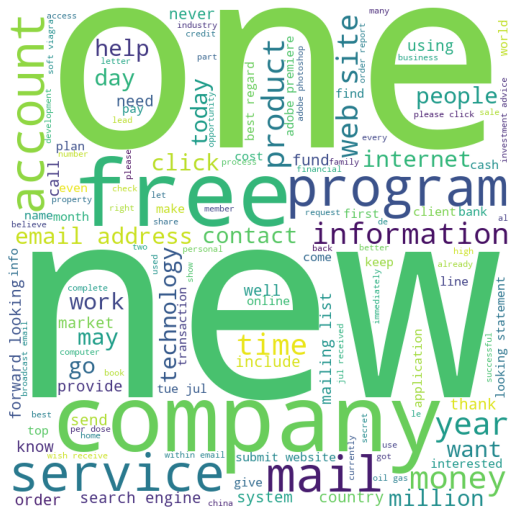

In [17]:
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# 광고성메일에서 쓰일 법한 new, free, company, product, service 등의 단어가 눈에 띈다.

In [18]:
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(non_spam) 

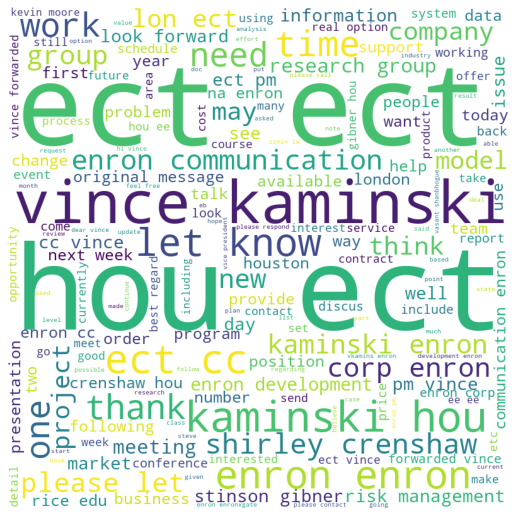

In [19]:
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# 업무용 이메일에서 쓰이는 포현인 thank, let, work, please, presentation 등의 표현이 있다.

# 4. 모델링


In [20]:
from sklearn.model_selection import train_test_split

# train_set, test_set 나누기, test_size=0.2 이며 
# target_data의 비율이 일정하지 않으므로 stratify옵션을 적용
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['spam'], 
                                                    test_size=0.2, random_state = 121,
                                                    stratify=data['spam'])


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score


# 모델의 종류로는 LogisticRegression, LGBMClassifier, RandomForestClassifier,
#                 KNeighborsClassifier, DecisionTreeClassifier, MultinomialNB,
#                 ExtraTreesClassifier를 사용하여 예측 정확도를 서로 비교하였다.

# 사이킷런 파이프라인을 사용하여 GridsearchCV와 결합한 모델을 구현

pipeline_lr = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_c lf', LogisticRegression(random_state=123))
])

pipeline_lgbm = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lgbm_clf', LGBMClassifier(random_state=123))
])

pipeline_rf = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('rf_clf', RandomForestClassifier(random_state=123))
])

pipeline_knn = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('knn_clf', KNeighborsClassifier())
])

pipeline_dt = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('dt_clf', DecisionTreeClassifier(random_state=123))
])

pipeline_nb = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('nb_clf', MultinomialNB())
])

pipeline_et = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('et_clf', ExtraTreesClassifier(random_state=123))
])

pipeline_list = [pipeline_lr, pipeline_lgbm, pipeline_rf, pipeline_knn,
                 pipeline_dt, pipeline_nb, pipeline_et]

# TfidfVectorizer의 파라미터 조정 
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2)],
           'tfidf_vect__max_df': [0.7, 0.8],
           'tfidf_vect__min_df': [0.01, 0.05, 0.1]
}

# 5. 평가 및 예측

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 예측 결과를 confusion_matrix를 통한 시각화
def visualize_confusion_matrix(y_test, pred):
    
    print(classification_report(y_test, pred))
    
    cf = confusion_matrix(y_test, pred)

    sns.heatmap(cf, annot = True, fmt = 'd',cmap = 'Reds')
    plt.xlabel('실제값')
    plt.ylabel('예측값')
    plt.show()

In [23]:
def grid_cv_pipe(pipeline_list):
   
    for pipeline in pipeline_list:

        grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=5 , 
                                    scoring='accuracy',verbose=1, refit = True)
        grid_cv_pipe.fit(X_train , y_train)
        print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

        pred = grid_cv_pipe.predict(X_test)
        print('Test_set 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))
        visualize_confusion_matrix(y_test, pred)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   35.4s finished


{'tfidf_vect__max_df': 0.7, 'tfidf_vect__min_df': 0.01, 'tfidf_vect__ngram_range': (1, 2)} 0.9816674841542337
Test_set 예측 정확도는 0.972
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       872
           1       0.97      0.92      0.94       274

    accuracy                           0.97      1146
   macro avg       0.97      0.95      0.96      1146
weighted avg       0.97      0.97      0.97      1146



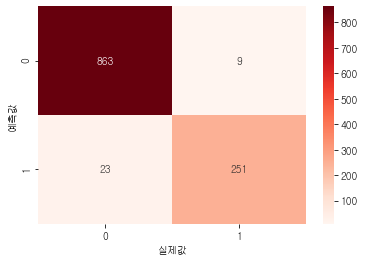

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.0min finished


{'tfidf_vect__max_df': 0.7, 'tfidf_vect__min_df': 0.01, 'tfidf_vect__ngram_range': (1, 1)} 0.9829770516160062
Test_set 예측 정확도는 0.973
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       872
           1       0.92      0.97      0.94       274

    accuracy                           0.97      1146
   macro avg       0.96      0.97      0.96      1146
weighted avg       0.97      0.97      0.97      1146



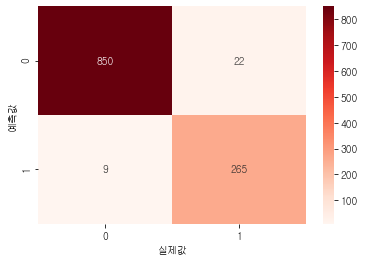

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.4min finished


{'tfidf_vect__max_df': 0.7, 'tfidf_vect__min_df': 0.01, 'tfidf_vect__ngram_range': (1, 2)} 0.9840673260537256
Test_set 예측 정확도는 0.987
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       872
           1       0.96      0.98      0.97       274

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



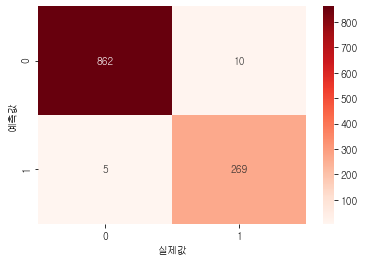

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   41.3s finished


{'tfidf_vect__max_df': 0.7, 'tfidf_vect__min_df': 0.1, 'tfidf_vect__ngram_range': (1, 1)} 0.9175036786940517
Test_set 예측 정확도는 0.896
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       872
           1       0.76      0.83      0.79       274

    accuracy                           0.90      1146
   macro avg       0.85      0.87      0.86      1146
weighted avg       0.90      0.90      0.90      1146



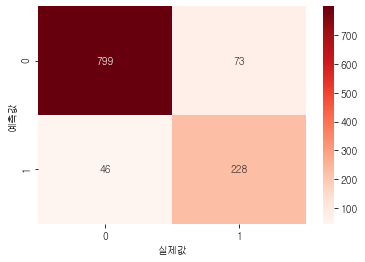

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   47.2s finished


{'tfidf_vect__max_df': 0.7, 'tfidf_vect__min_df': 0.05, 'tfidf_vect__ngram_range': (1, 2)} 0.9576593029291454
Test_set 예측 정확도는 0.955
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       872
           1       0.92      0.89      0.91       274

    accuracy                           0.96      1146
   macro avg       0.94      0.93      0.94      1146
weighted avg       0.96      0.96      0.96      1146



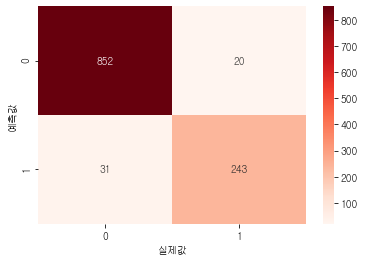

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   35.0s finished


{'tfidf_vect__max_df': 0.7, 'tfidf_vect__min_df': 0.01, 'tfidf_vect__ngram_range': (1, 1)} 0.9792647850166436
Test_set 예측 정확도는 0.967
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       872
           1       0.95      0.91      0.93       274

    accuracy                           0.97      1146
   macro avg       0.96      0.95      0.95      1146
weighted avg       0.97      0.97      0.97      1146



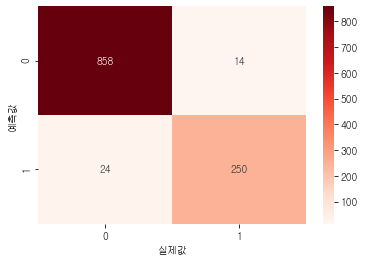

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.5min finished


{'tfidf_vect__max_df': 0.7, 'tfidf_vect__min_df': 0.01, 'tfidf_vect__ngram_range': (1, 2)} 0.9840675641569006
Test_set 예측 정확도는 0.986
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       872
           1       0.97      0.97      0.97       274

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



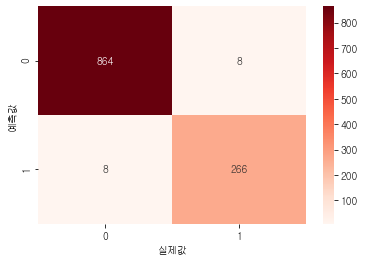

In [24]:
grid_cv_pipe(pipeline_list)

분석 결과 RandomForestClassifier, ExtraTreesClassifier 두 모델에서 높은 정확도를 보였다.  

RandomForestClassifier  
best_estimator : {'tfidf_vect__max_df': 0.7, 'tfidf_vect__min_df': 0.01, 'tfidf_vect__ngram_range': (1, 2)}  
best_score : 0.9840673260537256  
Test_set_score : 0.987  

ExtraTreesClassifier  
best_estimator : {'tfidf_vect__max_df': 0.7, 'tfidf_vect__min_df': 0.01, 'tfidf_vect__ngram_range': (1, 2)}  
best_score : 0.9840675641569006
Test_set_score : 0.986